In [235]:
import os
import numpy as np
import pandas as pd

data_path = "/mnt/data/volume/mimic/mimic-jpg/physionet.org/files/mimic-cxr-jpg/2.0.0"
imgs_path = os.path.join(data_path, "files")
metadata_path = os.path.join(data_path, "mimic-cxr-2.0.0-metadata.csv.gz")
splits_path = os.path.join(data_path, "mimic-cxr-2.0.0-split.csv.gz")
chexpert_path = os.path.join(data_path, "mimic-cxr-2.0.0-chexpert.csv.gz")
negbio_path = os.path.join(data_path, "mimic-cxr-2.0.0-negbio.csv.gz")

In [278]:
os.listdir(data_path)

['README',
 'mimic-cxr-2.0.0-metadata.csv.gz',
 'mimic-cxr-2.0.0-chexpert.csv.gz',
 'files',
 'mimic-cxr-2.0.0-split.csv.gz',
 'index.html',
 'mimic-cxr-2.0.0-negbio.csv.gz',
 'SHA256SUMS.txt',
 'LICENSE.txt']

In [236]:
metadata = pd.read_csv(metadata_path)
splits = pd.read_csv(splits_path)
chexpert = pd.read_csv(chexpert_path)
negbio = pd.read_csv(negbio_path)

In [237]:
# Here I'm just making sure the reference split is consistent for all images in the same study

# splits.groupby('study_id').apply(lambda x: len(set(x.split)) == 1).value_counts()

# Same with patients

# splits.groupby('subject_id').apply(lambda x: len(set(x.split)) == 1).value_counts()

In [238]:
import re

pattern = re.compile('p1\d')
group_folders = []

for folder in os.listdir(imgs_path):
    if pattern.match(folder):
        group_folders.append(os.path.join(imgs_path, folder))

In [239]:
# To query which group folder each jpg is in, needed for full path

def group_indexer():
    pattern = re.compile('p1\d')
    group_folders = []

    for folder in os.listdir(imgs_path):
        if pattern.match(folder):
            group_folders.append(os.path.join(imgs_path, folder))
    group_indexer = {}
    for folder in group_folders:
        print(folder)
        path = os.path.join(imgs_path, folder)
        patient_paths = next(os.walk(path))[1]
        for patient in patient_paths:
            path_ = os.path.join(path, patient)
            study_paths = next(os.walk(path_))[1]
            for study in study_paths:
                path__ = os.path.join(path_, study)
                imgs = next(os.walk(path__))
                for img in imgs[2]:
                    if img != 'index.html':
                        path___ = os.path.join(path__, img)
                        group_indexer[img] = path___
    return group_indexer

In [240]:
# Here, we add the img path to the csv and rewrite it to the data folder
# img_paths = []

# for x in splits.dicom_id:
#     if x+'.jpg' in group_indexer.keys():
#         img_paths.append(group_indexer[x+'.jpg'])
#     else:
#         print("OH NO")

# assert len(img_paths) == len(splits)


# splits["path"] = img_paths
# out_path = "data/mimic/splits_with_paths.csv"
# splits.to_csv(out_path,index=False)

In [261]:
# We make sure the 8 missing Chexpert labels have No Finding labelled

# splits_ref = pd.read_csv("data/mimic/splits_with_paths.csv")

# print(len(set(splits_ref.study_id)), len(set(chexpert.study_id)))

# all_studies = set(splits_ref.study_id)
# chexpert_studies = set(chexpert.study_id)

# missing_studies = all_studies.difference(chexpert_studies)
# missing_label = np.array([np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,  1., np.nan, np.nan, np.nan, np.nan, np.nan])

# We add label directly to splits_ref to make new csv

# study_ids = splits_ref.study_id
# chexpert_id_to_label = dict(zip(chexpert.study_id, chexpert.values[:,2:]))

# matching_labels = [chexpert_id_to_label[id_x] if id_x not in missing_studies else missing_label for id_x in study_ids]

# labels_frame = pd.DataFrame(matching_labels,columns=chexpert.columns[2:])
# splits_ref.join(labels_frame).head().to_csv("data/mimic/all_paths_and_annotations.csv",index=False)

data = pd.read_csv("data/mimic/all_paths_and_annotations.csv")


227835 227827


In [275]:
data.head().iloc[1,5:].values




array([nan, nan, nan, nan, nan, nan, nan, nan, 1.0, nan, nan, nan, nan,
       nan], dtype=object)

In [ ]:
missing_studies = all_studies.difference(chexpert_studies)

for i in range(len(chexpert)):
    study = chexpert.iloc[i,:].study_id
    if study in missing_studies:
        chexpert

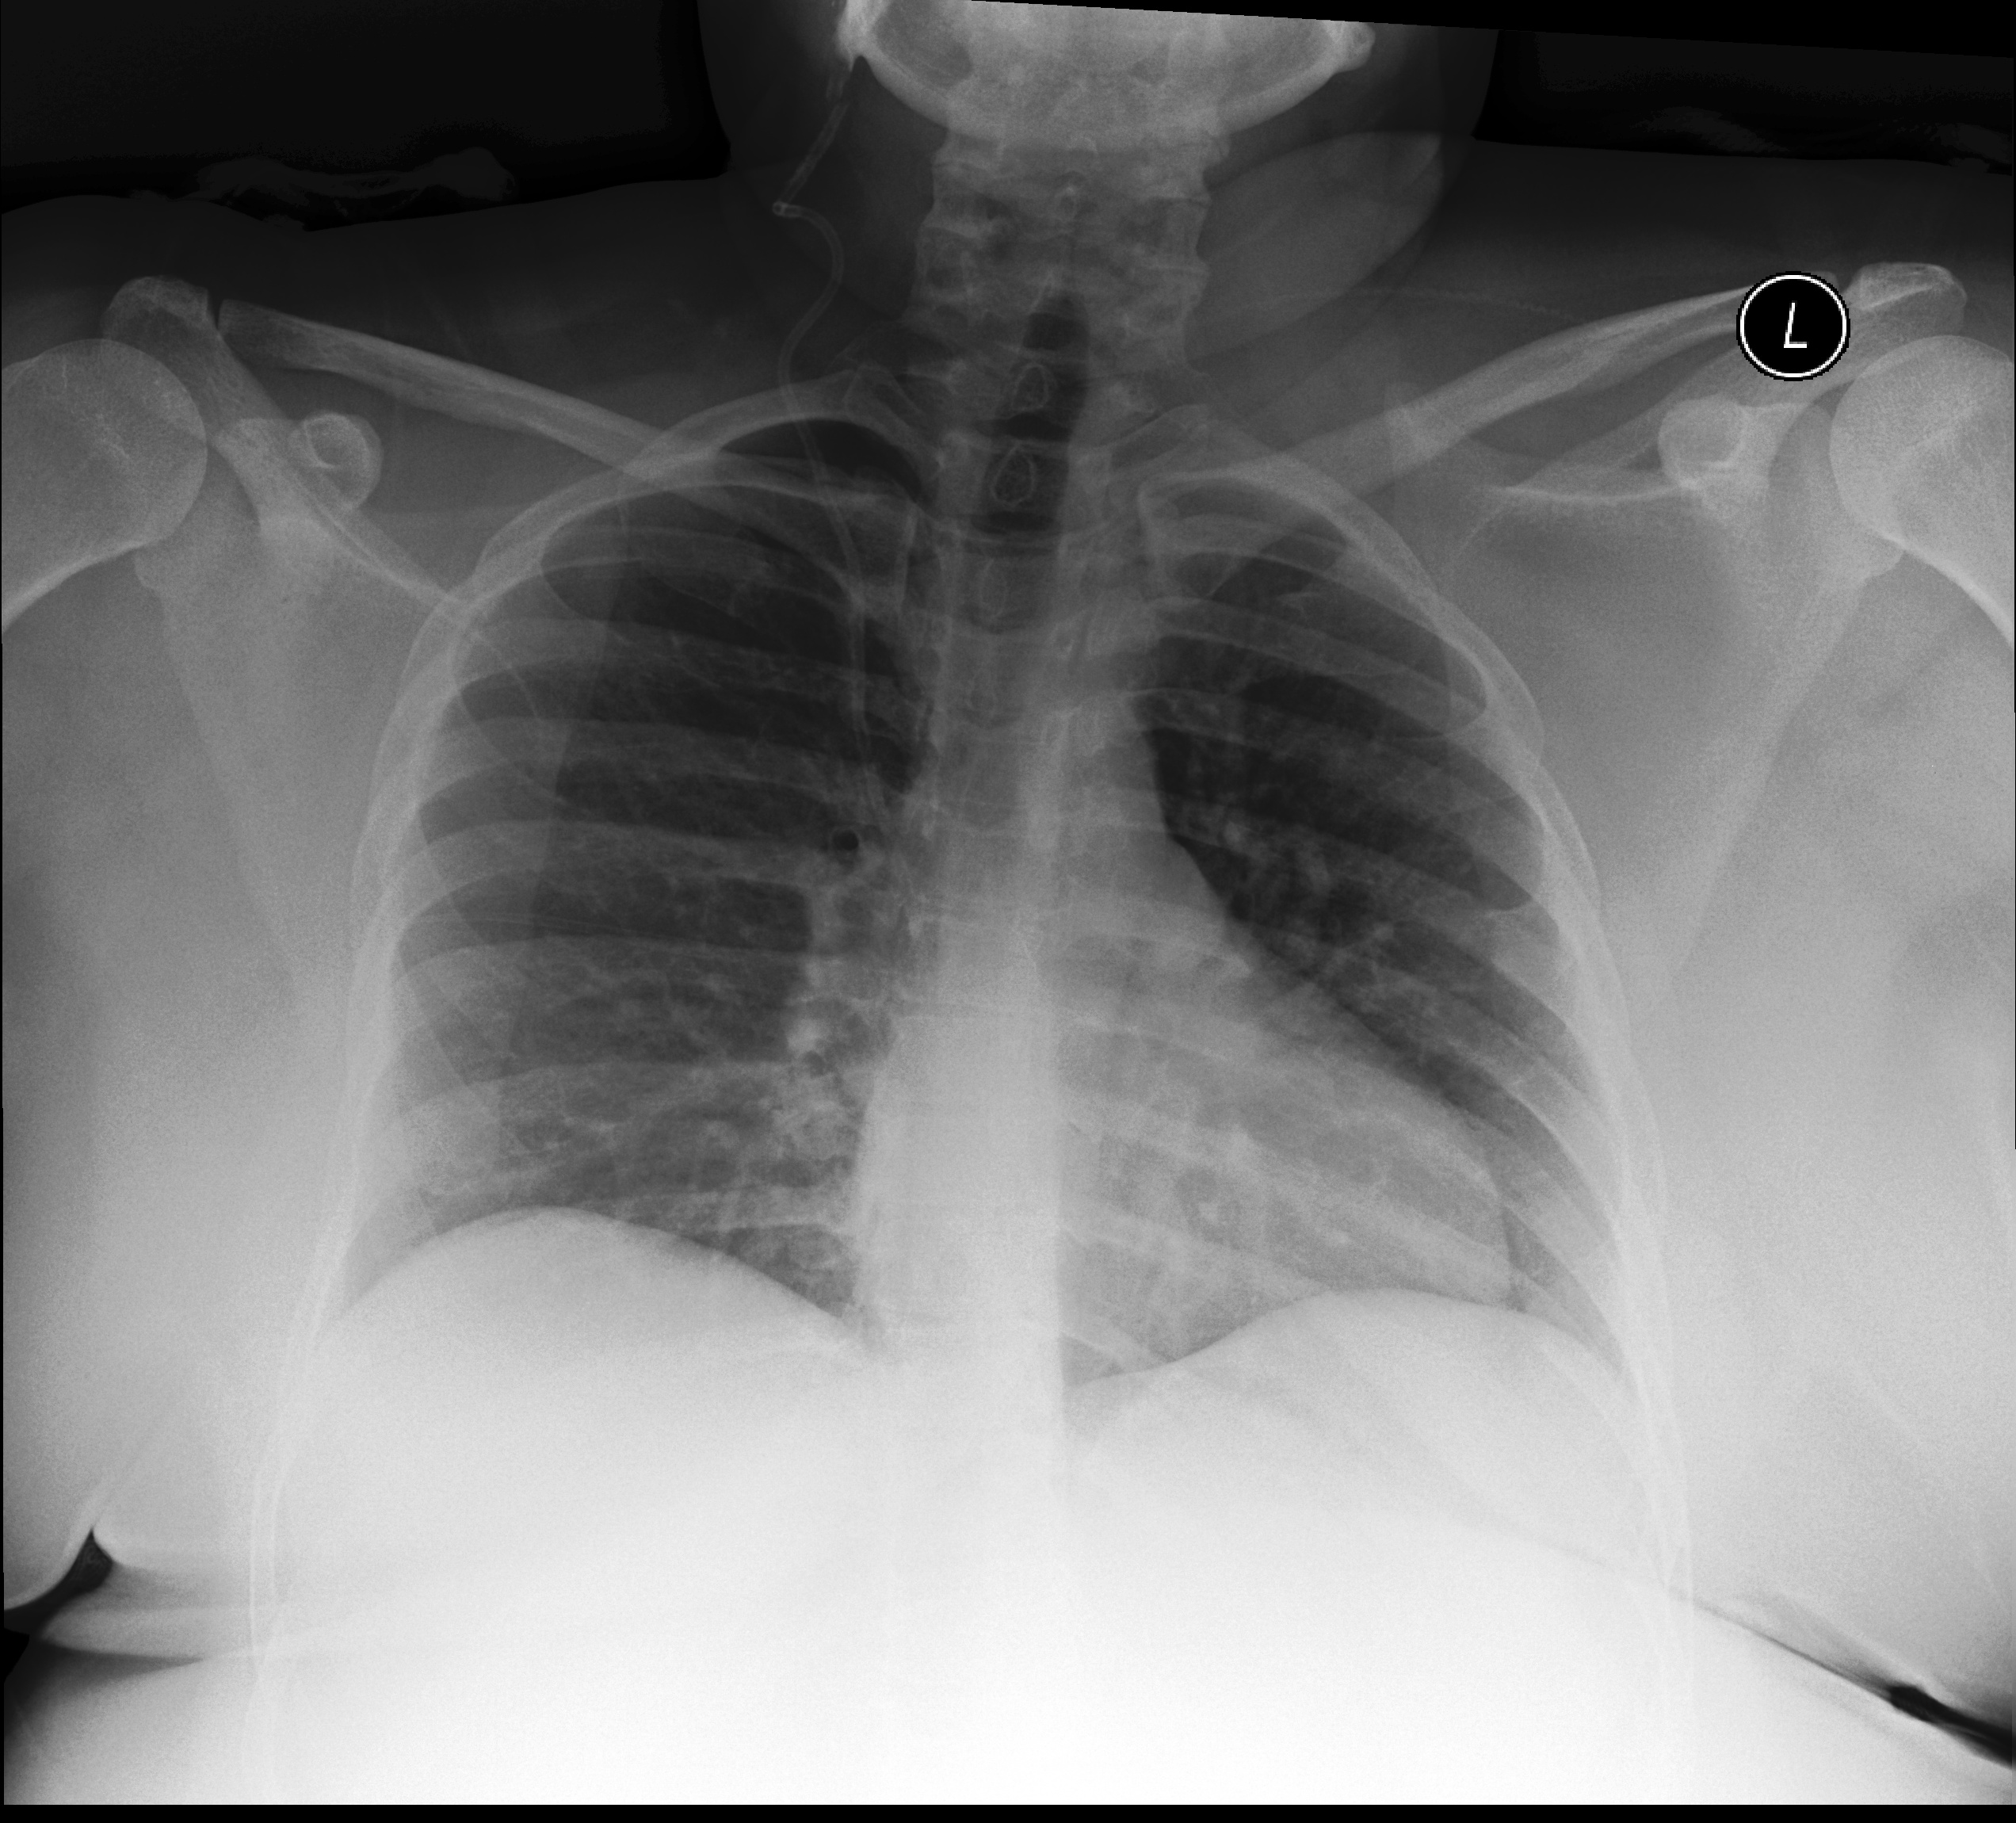

In [78]:
# Check out sample image

from PIL import Image

sample_img_path = os.path.join(imgs_path, group_folders[0])
patient_path = next(os.walk(sample_img_path))[1][0]
sample_img_path = os.path.join(sample_img_path, patient_path)
study_path = next(os.walk(sample_img_path))[1][0]
sample_img_path = os.path.join(sample_img_path, study_path)
img_path = next(os.walk(sample_img_path))[2][0]
sample_img_path = os.path.join(sample_img_path, img_path)

sample_img = Image.open(sample_img_path)

cropped_img = sample_img.crop((0, 200, 2544, 2500))
cropped_img

In [212]:
# We first try to reproduce original Chexpert training method


(3, 227827)

In [213]:
splits_ref.study_id

0    50414267
1    50414267
2    53189527
3    53189527
4    53911762
Name: study_id, dtype: int64